In [67]:
import os
import pathlib
import numpy as np
import PIL
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
root='E:\Ali\Machine Learning\Datasets\Image Datasets'

In [3]:
b=os.listdir(root)
b

['Alzheimer_s Dataset',
 'Brain Tumor Classification 1',
 'Brain Tumor Classification 2',
 'Covid19_data',
 'Dataset_BUSI_with_GT',
 'flower_photos',
 'Garbage_classification',
 "Pet's Facial Impression Image Dataset",
 "Pet's Images"]

In [4]:
data_dir=os.path.join(root,b[2])
data_dir

'E:\\Ali\\Machine Learning\\Datasets\\Image Datasets\\Brain Tumor Classification 2'

In [5]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/glioma/Te-glTr_0000.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/glioma/Te-glTr_0001.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/glioma/Te-glTr_0002.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/glioma/Te-glTr_0003.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/glioma/Te-glTr_0004.jpg')]

In [7]:
len(list(data_dir.glob('*/*.jpg')))

3625

In [8]:
list(data_dir.glob('glioma/*'))[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/glioma/Te-glTr_0000.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/glioma/Te-glTr_0001.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/glioma/Te-glTr_0002.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/glioma/Te-glTr_0003.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/glioma/Te-glTr_0004.jpg')]

In [9]:
len(list(data_dir.glob('glioma/*')))

820

In [10]:
list(data_dir.glob('meningioma/*'))[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/meningioma/Te-meTr_0000.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/meningioma/Te-meTr_0001.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/meningioma/Te-meTr_0002.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/meningioma/Te-meTr_0003.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/meningioma/Te-meTr_0004.jpg')]

In [11]:
len(list(data_dir.glob('meningioma/*')))

845

In [12]:
list(data_dir.glob('notumor/*'))[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/notumor/Te-noTr_0000.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/notumor/Te-noTr_0001.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/notumor/Te-noTr_0002.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/notumor/Te-noTr_0003.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/notumor/Te-noTr_0004.jpg')]

In [13]:
len(list(data_dir.glob('notumor/*')))

1000

In [14]:
list(data_dir.glob('pituitary/*'))[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/pituitary/Te-piTr_0000.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/pituitary/Te-piTr_0001.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/pituitary/Te-piTr_0002.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/pituitary/Te-piTr_0003.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/pituitary/Te-piTr_0004.jpg')]

In [15]:
len(list(data_dir.glob('pituitary/*')))

960

In [16]:
glioma=list(data_dir.glob('glioma/*'))
glioma[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/glioma/Te-glTr_0000.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/glioma/Te-glTr_0001.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/glioma/Te-glTr_0002.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/glioma/Te-glTr_0003.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/glioma/Te-glTr_0004.jpg')]

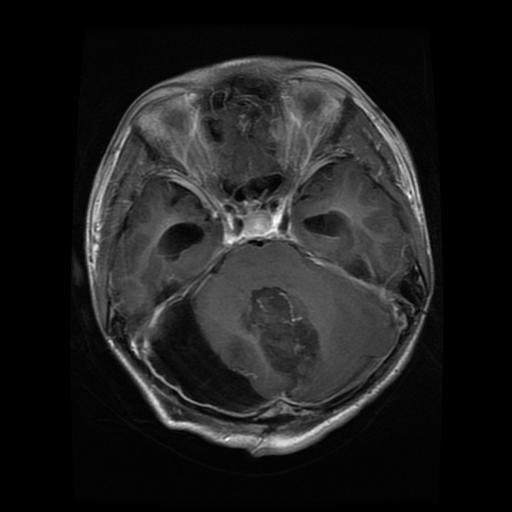

In [17]:
PIL.Image.open(str(glioma[0]))

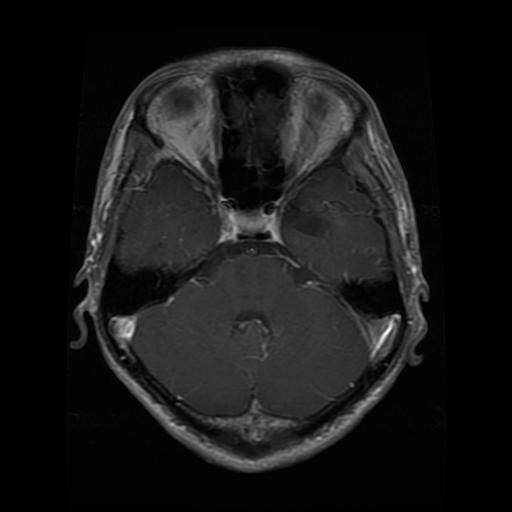

In [18]:
PIL.Image.open(str(glioma[1]))

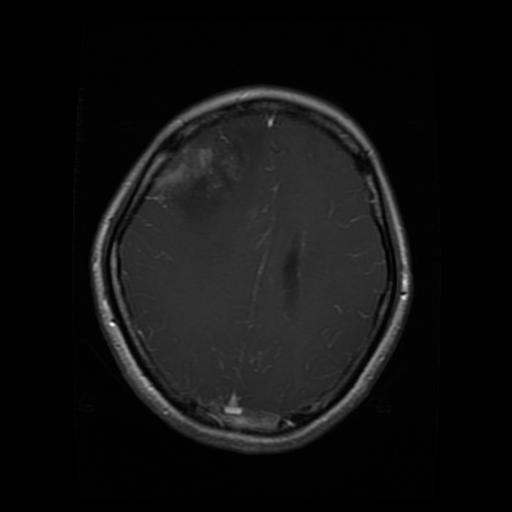

In [19]:
PIL.Image.open(str(glioma[2]))

In [20]:
meningioma=list(data_dir.glob('meningioma/*'))
meningioma[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/meningioma/Te-meTr_0000.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/meningioma/Te-meTr_0001.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/meningioma/Te-meTr_0002.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/meningioma/Te-meTr_0003.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/meningioma/Te-meTr_0004.jpg')]

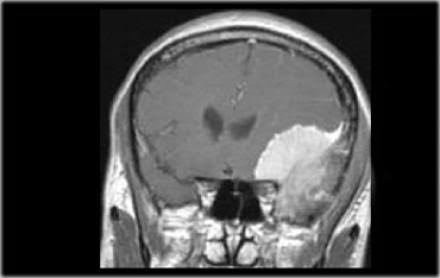

In [21]:
PIL.Image.open(str(meningioma[0]))

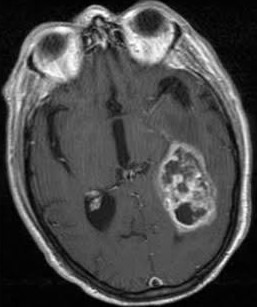

In [22]:
PIL.Image.open(meningioma[1])

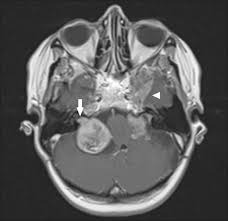

In [23]:
PIL.Image.open(str(meningioma[2]))

In [24]:
notumor=list(data_dir.glob('notumor/*'))
notumor[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/notumor/Te-noTr_0000.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/notumor/Te-noTr_0001.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/notumor/Te-noTr_0002.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/notumor/Te-noTr_0003.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/notumor/Te-noTr_0004.jpg')]

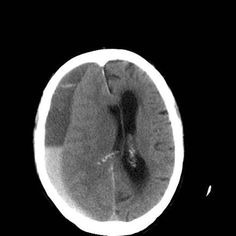

In [25]:
PIL.Image.open(str(notumor[0]))

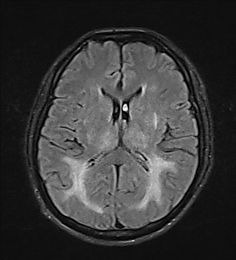

In [26]:
PIL.Image.open(str(notumor[1]))

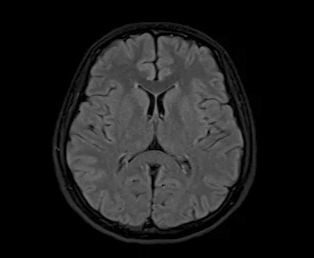

In [27]:
PIL.Image.open(str(notumor[2]))

In [28]:
pituitary=list(data_dir.glob('pituitary/*'))
pituitary[:5]

[WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/pituitary/Te-piTr_0000.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/pituitary/Te-piTr_0001.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/pituitary/Te-piTr_0002.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/pituitary/Te-piTr_0003.jpg'),
 WindowsPath('E:/Ali/Machine Learning/Datasets/Image Datasets/Brain Tumor Classification 2/pituitary/Te-piTr_0004.jpg')]

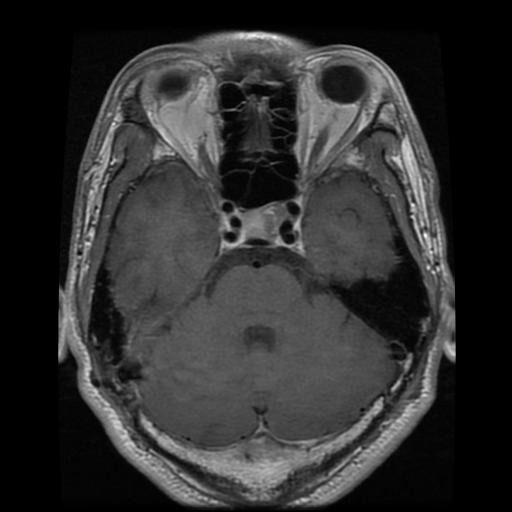

In [29]:
PIL.Image.open(str(pituitary[0]))

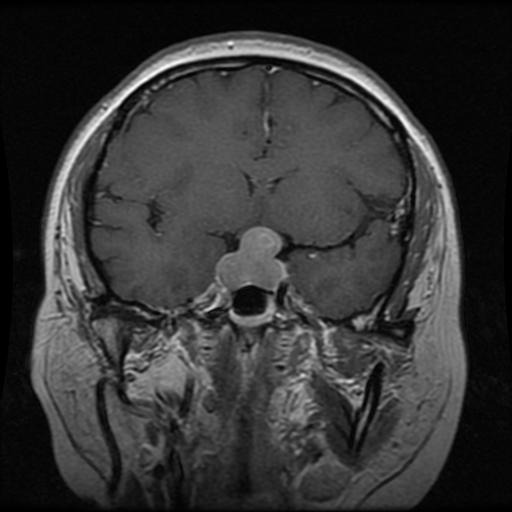

In [30]:
PIL.Image.open(str(pituitary[1]))

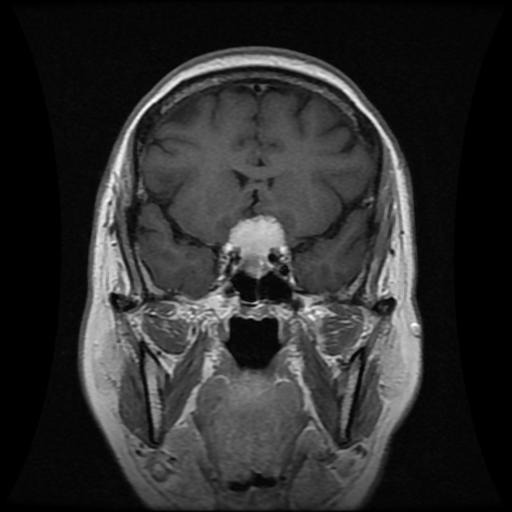

In [31]:
PIL.Image.open(str(pituitary[2]))

In [32]:
X,y=[],[]

In [33]:
for image in glioma:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(240,240))
    X.append(resized_img)
    y.append(0)

In [34]:
for image in meningioma:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(240,240))
    X.append(resized_img)
    y.append(1)

In [35]:
for image in notumor:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(240,240))
    X.append(resized_img)
    y.append(2)

In [36]:
for image in pituitary:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(240,240))
    X.append(resized_img)
    y.append(3)

In [37]:
X[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [38]:
y[0]

0

In [43]:
X[1000]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [44]:
y[1000]

1

In [46]:
X[1800]

array([[[ 20,  22,  23],
        [ 20,  22,  23],
        [ 20,  22,  23],
        ...,
        [ 12,  14,  15],
        [ 35,  37,  38],
        [165, 167, 168]],

       [[ 20,  22,  23],
        [ 20,  22,  23],
        [ 20,  22,  23],
        ...,
        [ 12,  14,  15],
        [ 35,  37,  38],
        [165, 167, 168]],

       [[ 20,  22,  23],
        [ 20,  22,  23],
        [ 20,  22,  23],
        ...,
        [ 11,  14,  15],
        [ 35,  37,  38],
        [165, 167, 168]],

       ...,

       [[ 19,  21,  22],
        [ 19,  21,  22],
        [ 19,  21,  22],
        ...,
        [ 13,  15,  15],
        [ 36,  38,  39],
        [166, 168, 169]],

       [[ 19,  21,  22],
        [ 19,  21,  22],
        [ 19,  21,  22],
        ...,
        [ 13,  15,  15],
        [ 36,  38,  39],
        [166, 168, 169]],

       [[ 19,  21,  22],
        [ 19,  21,  22],
        [ 19,  21,  22],
        ...,
        [ 13,  15,  15],
        [ 36,  38,  39],
        [166, 168, 169]]

In [47]:
y[1800]

2

In [50]:
X[2800]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [51]:
y[2800]

3

In [52]:
X=np.array(X)
y=np.array(y)

In [53]:
X.shape

(3625, 240, 240, 3)

In [54]:
y.shape

(3625,)

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [56]:
X_train.shape

(2900, 240, 240, 3)

In [57]:
X_test.shape

(725, 240, 240, 3)

In [58]:
len(y_train)

2900

In [59]:
len(y_test)

725

In [60]:
X_train[0]

array([[[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       ...,

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[16, 16, 16],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]]], dtype=uint8)

In [61]:
X_test[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [62]:
X_train_scaled=X_train/255

In [63]:
X_test_scaled=X_test/255

In [65]:
X_train_scaled[0]

array([[[0.0627451, 0.0627451, 0.0627451],
        [0.0627451, 0.0627451, 0.0627451],
        [0.0627451, 0.0627451, 0.0627451],
        ...,
        [0.0627451, 0.0627451, 0.0627451],
        [0.0627451, 0.0627451, 0.0627451],
        [0.0627451, 0.0627451, 0.0627451]],

       [[0.0627451, 0.0627451, 0.0627451],
        [0.0627451, 0.0627451, 0.0627451],
        [0.0627451, 0.0627451, 0.0627451],
        ...,
        [0.0627451, 0.0627451, 0.0627451],
        [0.0627451, 0.0627451, 0.0627451],
        [0.0627451, 0.0627451, 0.0627451]],

       [[0.0627451, 0.0627451, 0.0627451],
        [0.0627451, 0.0627451, 0.0627451],
        [0.0627451, 0.0627451, 0.0627451],
        ...,
        [0.0627451, 0.0627451, 0.0627451],
        [0.0627451, 0.0627451, 0.0627451],
        [0.0627451, 0.0627451, 0.0627451]],

       ...,

       [[0.0627451, 0.0627451, 0.0627451],
        [0.0627451, 0.0627451, 0.0627451],
        [0.0627451, 0.0627451, 0.0627451],
        ...,
        [0.0627451, 0.0627

In [70]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(240,240,3)),
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.3)
])

In [71]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(80,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(65,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(50,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(35,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(500,activation='relu'),
    layers.Dense(350,activation='relu'),
    layers.Dense(200,activation='relu'),
    layers.Dense(4,activation='softmax')
])

In [72]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
91/91 [==============================] - 475s 5s/step - loss: 1.1178 - accuracy: 0.5014
Epoch 2/30
91/91 [==============================] - 395s 4s/step - loss: 0.8994 - accuracy: 0.6279
Epoch 3/30
91/91 [==============================] - 393s 4s/step - loss: 0.8179 - accuracy: 0.6793
Epoch 4/30
91/91 [==============================] - 391s 4s/step - loss: 0.7236 - accuracy: 0.7086
Epoch 5/30
91/91 [==============================] - 392s 4s/step - loss: 0.7637 - accuracy: 0.6914
Epoch 6/30
91/91 [==============================] - 396s 4s/step - loss: 0.6825 - accuracy: 0.7362
Epoch 7/30
91/91 [==============================] - 413s 5s/step - loss: 0.6120 - accuracy: 0.7590
Epoch 8/30
91/91 [==============================] - 410s 4s/step - loss: 0.5995 - accuracy: 0.7614
Epoch 9/30
91/91 [==============================] - 407s 4s/step - loss: 0.5587 - accuracy: 0.7848
Epoch 10/30
91/91 [==============================] - 404s 4s/step - loss: 0.5439 - accuracy: 0.7828
Epoch 11/

In [79]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 26s 1s/step - loss: 0.3252 - accuracy: 0.9034


[0.3252268135547638, 0.9034482836723328]

In [80]:
y_pred=model.predict(X_test_scaled)
y_pred[:5]

23/23 [==============================] - 25s 1s/step


array([[1.3040001e-09, 7.0085526e-03, 9.9299145e-01, 1.8194505e-08],
       [1.1753484e-03, 1.5476348e-02, 5.7417792e-03, 9.7760653e-01],
       [4.7122893e-07, 8.4189230e-01, 1.5810363e-01, 3.6272702e-06],
       [2.0686991e-03, 5.7223234e-02, 2.9295266e-03, 9.3777853e-01],
       [2.8667878e-03, 9.9713314e-01, 1.4581787e-13, 1.2512912e-15]],
      dtype=float32)

In [82]:
y_predict=[np.argmax(i) for i in y_pred]
y_predict[:5]

[2, 3, 1, 3, 1]

In [83]:
y_test[:5]

array([2, 3, 1, 3, 1])

In [84]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       143
           1       0.86      0.80      0.83       188
           2       0.97      0.90      0.93       194
           3       0.91      0.97      0.94       200

    accuracy                           0.90       725
   macro avg       0.90      0.90      0.90       725
weighted avg       0.90      0.90      0.90       725



In [85]:
confusion_matrix(y_predict,y_test)

array([[135,   5,   2,   1],
       [ 16, 151,   4,  17],
       [  0,  18, 175,   1],
       [  4,   2,   0, 194]], dtype=int64)

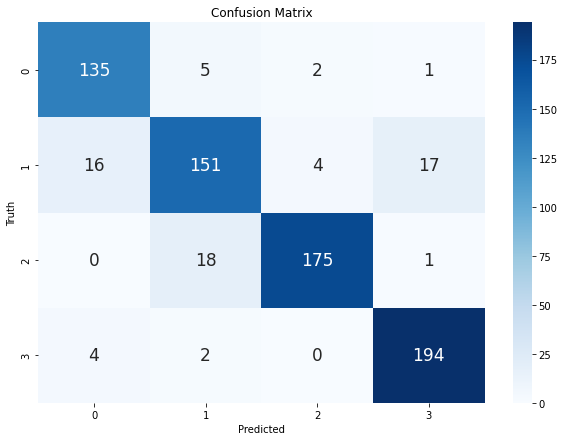

In [89]:
cm=confusion_matrix(y_predict,y_test)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={'size':17},fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()